In [71]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [11]:
path = 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (3)'
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=False, axis=1)

In [14]:
# assign dataset names
ms = [40, 100, 200, 400, 800, 1200, 3200]
 
# create empty list
dataframes_list = []
 
# append datasets into the list
for i in range(len(ms)):
    temp_df = pd.read_csv("./csv/"+ms[i]+".csv")
    dataframes_list.append(temp_df)

all_loss_values       all_test_loss_values
72.24261                          75.69434
61.546154                         65.18326
53.283924                        56.996395
46.780254                         50.49353
                              ...         
1.3399481773376465                1.557792
1.339901089668274                 1.557727
1.3398537635803223                1.557662
1.3398065567016602                1.557597
1.339759111404419                 1.557531
Name: 0, Length: 70007, dtype: object

In [15]:
op = [pd.read_csv(f) for f in all_files]

In [24]:
op[0].T[0]

all_loss_values       all_test_loss_values
72.24261                          75.69434
61.546154                         65.18326
53.283924                        56.996395
46.780254                         50.49353
                              ...         
0.9474741816520691                 0.38353
0.9474536180496216                0.383523
0.9474327564239502                0.383515
0.9474120140075684                0.383508
0.9473913311958313                0.383501
Name: 0, Length: 10001, dtype: object

In [25]:
all_files

['Experiments/Lyapunov_eq_van_der_pool_2d_train_False (3)/results_m_1200_act_<function cos at 0x7fce3000a7a0>.csv',
 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (3)/results_m_400_act_<function cos at 0x7fce3000a7a0>.csv',
 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (3)/results_m_800_act_<function cos at 0x7fce3000a7a0>.csv',
 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (3)/results_m_3200_act_<function cos at 0x7fce3000a7a0>.csv',
 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (3)/results_m_200_act_<function cos at 0x7fce3000a7a0>.csv',
 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (3)/results_m_40_act_<function cos at 0x7fce3000a7a0>.csv',
 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (3)/results_m_100_act_<function cos at 0x7fce3000a7a0>.csv']

In [70]:
path = 'Experiments/Lyapunov_eq_van_der_pool_2d_train_False (4)'
all_files = glob.glob(os.path.join(path, "*.csv"))
op = [pd.read_csv(f, header = 0) for f in all_files]

In [61]:
def make_good_dfs(df):
    df = df.T
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    df.columns = new_header #set the header row as the df header
    return df
dfs = [make_good_dfs(df) for df in op]

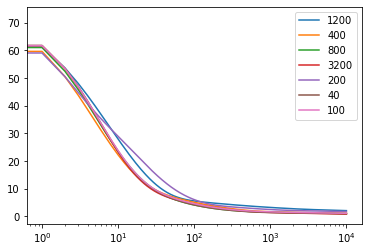

In [78]:
ms = [1200, 400, 800, 3200, 200, 40, 100]

for (m, df) in zip(ms, dfs):
    plt.plot(df['all_loss_values'], label = m)
    plt.xscale('log')
plt.legend()
plt.show()